<h1>The Battle of Neighborhoods - Coursera IBM capstone Project

Author: Raihan Insan Habibi

Project Title:

## Visual Approach to Determine Strategic Location for a New Covid-19 Testing Center in Ankara Using Data Science / Data Analytics Tool Kits

<h3>1.Introduction / Business Problem

At the beginning of 2020, cities around the globe were under attack by an invisible army called 'Novel Corona Virus'  known as 'Covid-19'. While every effort has focused on solving or minimizing problems at hand, other professionals such as Data scientists may need to assess the current situations in the city, such as the availability, the number, and the geographical distribution (location) of health infrastructures such as virus testing centers or 'specialist' hospital capable of handling and detecting such disease that standard hospitals cannot. It is due to the nature of the viral infection requiring more sophisticated instruments, reagents,  assay techniques, and high-throughput sample analysis platforms. In this article, I would like to describe a simple analysis for determining a strategic location for a new Covid-19 testing center in any city (Ankara in this case) using data science/data analytics toolsets. here is a highlighted map of Ankara city in Turkey

In [1]:
import folium
import json

turkey_map = folium.Map([39.7334, 32.8597], zoom_start=8)
f = open("tr-cities.json")
data = json.load(f)
data["features"] = [data["features"][6]]
folium.GeoJson(data).add_to(turkey_map)
turkey_map
#data

**Case Scenario**:

After doing Research, the government of the city may need to better allocate an additional resource such as building a new testing center to better prepare the city for future potential outbreak of another evolved virus. Alternatively, private investors could take the business investment opportunity, especially in a big city like Ankara. Typically, the investors may be interested to know:

1. The number or the extent of Covid-19 positive cases patients and their relative distribution within the city.
2. The number and locations of the existing and approved Covid-19 testing centers in the city (i.e. the competitors).
3. TWO (2) candidate strategic locations for the new Covid-19 testing center relatively far from the competition.
4. Population density of the proposed area (Social distancing indicator).
5. Basic profile of the proposed neighborhood (e.g. the presence of unique clustering such as residential areas, business / office areas, the number and types of other businesses venues, etc).

For point (1), the investor obviously would like to know the extent of epidemics in the area. For Point 2, they need to make sure that their investment is located in an area relatively far away from any competitors having similar facilities at the time their business venture starts. The 3rd point requires visualization that we will discuss below. The 4th point also indicates the potential target customers. The higher the population density, the higher the potential users of the facility. The 5th point indicates the current level of business activity in the proposed area. The higher the number of business venues, the higher the number of business activity in the area. Certainly, all investors would like the area to have many different business ventures already established in the proposed neighborhood. we will begin this artice by importing all the modules needed for the whole report.

In [2]:
import requests # library to handle requests
print("done importing request")
from urllib.request import urlopen as uReq 
print("done importing urlib")
import pandas as pd # library for data analsysis
print("done importing pandas")
import numpy as np # library to handle data in a vectorized manner
print("done importing numpy")
import random # library for random number generation
print("done importing random")


done importing request
done importing urlib
done importing pandas
done importing numpy
done importing random


In [3]:
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
print("done importing geopy")
from typing import Container
print("done import container")
import functools
print("done functools")
from functools import partial
print("done importing partial from functool")
from pandas import read_excel
print("done importing read excel pandas")
import json
print("done importing json stringify")


done importing geopy
done import container
done functools
done importing partial from functool
done importing read excel pandas
done importing json stringify


In [4]:
# libraries for displaying images
from IPython.display import Image 
print("done importinhg image")
from IPython.core.display import HTML 
print("done importing  image from ipython")
from IPython.display import display_html
print("done importing display html")
import pandas as pd
print("done importing pandas")
import numpy as np
print("done impoering numpy")
from numpy.core.numeric import NaN
print("done importing Nan value")


done importinhg image
done importing  image from ipython
done importing display html
done importing pandas
done impoering numpy
done importing Nan value


In [5]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print("done importing pandas json")
import folium # plotting library
print("done importing folium")
from bs4 import BeautifulSoup as BS
print("done impoerting bs4")
from sklearn.cluster import KMeans
print("done importing sklearn cluster")
import matplotlib.cm as cm
print("done importing cm from matplotlib")
import matplotlib.colors as colors
print("done importing matplotlib colorss")
import matplotlib.pyplot as plt
print('done importing matplotlib')

print("done installing all the packages successfully")

done importing pandas json
done importing folium
done impoerting bs4
done importing sklearn cluster
done importing cm from matplotlib
done importing matplotlib colorss
done importing matplotlib
done installing all the packages successfully


### 2. Data

Based on the requirements from the potential investors above, the necessary information needed for this analysis will come from the following online sources:

1. The number of positive cases patients in each province: https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Turkey, that shows the number of positive Covid-19 patients
2. The population density will be obtained from Wikipedia for Ankara (https://en.wikipedia.org/wiki/Ankara_Province). As can be seen, Ankara is the special capital region of Turkey having a total area 25,706 square kilometers  and a total of 5,503,985 population in 2020. However, I will scrap the Table in the Wikipedia showing the population density in 2017 only. Ankara has 81 main cities. 
3. The number of existing and approved Covid-19 testing centers or 'Specialist' hospitals from the Ministry of Health website (https://en.wikipedia.org/wiki/List_of_hospitals_in_Ankara_Province) in Turkey
4. the number of positive cases in Ankara province(https://covid19.saglik.gov.tr/)
5. OpenCage Geocoder API to collect latitude and longitude of cities, area or facility (e.g. hospitals)
6. the population growth affect the rate of covid 19 cases (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7553801/)

In addition to these resources or websites, there are also other potential or highly relevant sources which can be used for example related to the number of available hospital beds for patients. This can be obtained (for future reference) from Ministry of Health website (https://healtheconomicsreview.biomedcentral.com/articles/10.1186/s13561-021-00338-8), (https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0242398),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7882903/ in Turkey. I also used other resources such as Folium which can be used for Visualization purposes and BeautifulSoup for scrapping website as described in more details in the following sections.

#### 2.1. Covid - 19  Data Analysis of Turkey

The following describes a web scrapping technique commonly used by data scientist to get the information from public website. After inspecting the original Wikipedia page, one would need to isolate the relevant HTML codes for the desired Table using Requests, BeautifulSoup library and etc. this data shows the number of postive covid - 19 in every city in Turkey, from this information we can tell the ranking of Ankara city compared to other city 

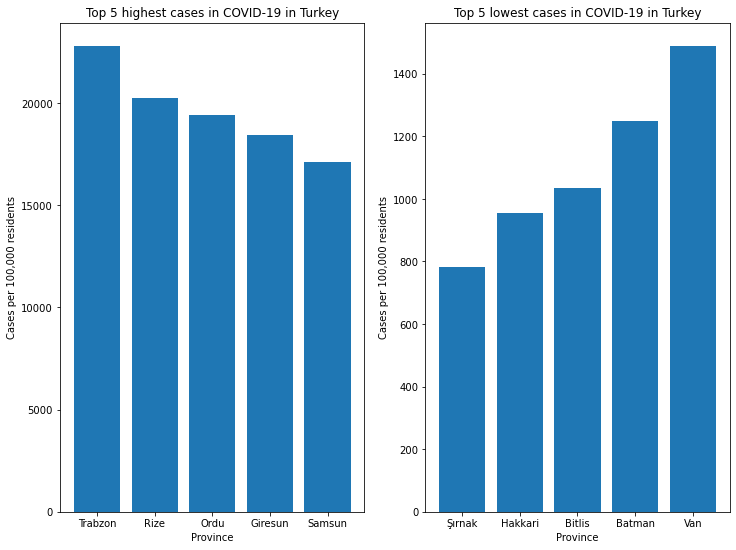

In [6]:
myurl = "https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Turkey"

#grabbing information from the page
uclient = uReq(myurl)
page_html = uclient.read()
uclient.close()
page_BS = BS(page_html, "html.parser")

whole_id_container = page_BS.find_all("div", {"id":"covid19-container"})

content = whole_id_container[0]

rows = content.table.find_all("tr")

table_name_content = []

number_cases_in_city = []


#cleaning the row in the list

for row in rows[3:]:
    for x in row.find_all("th"):
        try:
            table_name_content.append(x.a.text)
        except:
            pass

for row in rows[3:]:
    try:
        word = row.td.text.replace("\n", "")
        number = int(word.replace(",", ""))
        number_cases_in_city.append(number)

    except:
        pass

#making database

table_name_content = list(table_name_content)

number_cases_in_city = list(number_cases_in_city)

turkey_DB =  {"city names":table_name_content, "number of postive cases":number_cases_in_city}

TDF = pd.DataFrame(turkey_DB)

#making graph

plt.rcParams["figure.figsize"] = (12, 9) # (w, h)

TDF = TDF.sort_values(by=["number of postive cases"],ascending = False)

plt.subplot(1, 2, 1)

plt.bar(TDF["city names"][:5], TDF["number of postive cases"][:5])

plt.title("Top 5 highest cases in COVID-19 in Turkey")
plt.xlabel("Province")
plt.ylabel("Cases per 100,000 residents")

TDF = TDF.sort_values(by=["number of postive cases"],ascending = True)

plt.subplot(1, 2, 2)

plt.bar(TDF["city names"][:5], TDF["number of postive cases"][:5])

plt.title("Top 5 lowest cases in COVID-19 in Turkey")
plt.xlabel("Province")
plt.ylabel("Cases per 100,000 residents")


TDF = TDF.sort_values(by=["number of postive cases"],ascending = False)

we can also make a database from this whole data so we can tell more accurate information. using this idea, we can determine the ranking of each city in turkey. This is important because now we will better understand what enviromental features effects the growth of the virus and what decreases it. Since this data is not live and was web scraped from wikipedia edited in 2020, we can assume that in that year the city of Trabzon has higher positive cases. 

In [7]:
TDF

,city names,number of postive cases
73,Trabzon,22802
63,Rize,20244
61,Ordu,19442
32,Giresun,18434
65,Samsun,17129
...,...,...
76,Van,1489
13,Batman,1249
16,Bitlis,1035
34,Hakkari,955


using simple python index method to find the ranking of Ankara

In [8]:
print("Ankara is number "+str(list(TDF["city names"]).index("Ankara")) + " in the higest number of positive cases")

Ankara is number 50 in the higest number of positive cases


### 2.2 covid 19 analysis in each province of Ankara 

In [9]:
myurl = "https://en.wikipedia.org/wiki/Ankara_Province"

# grapbs the page
uclient = uReq(myurl)
page_html = uclient.read()
uclient.close()
page_BS = BS(page_html, "html.parser")
#content>body content>mw content text>output> table
div1 = page_BS.find("div", {"id": "content"})
div2 = div1.find("div", {"id": "bodyContent"})
div3 = div2.find("div", {"id": "mw-content-text"})
div4 = div3.find("div", {"class": "mw-parser-output"})
table = div4.find("table", {"class": "wikitable sortable"})
rows = table.find_all("tr")
table_df = {"province name": [], "population": [],
            "area in KM^2": [], "Density in KM^2": []}


In [10]:
table

<table class="wikitable sortable">
<tbody><tr>
<th>District
</th>
<th>Population (2017)
</th>
<th>Area (km²)
</th>
<th>Density (per km²)
</th></tr>
<tr>
<td>Akyurt
</td>
<td>32.863
</td>
<td>369
</td>
<td>89
</td></tr>
<tr>
<td>Altındağ
</td>
<td>371.366
</td>
<td>123
</td>
<td>3.019
</td></tr>
<tr>
<td>Ayaş
</td>
<td>12.289
</td>
<td>1.041
</td>
<td>12
</td></tr>
<tr>
<td>Bala
</td>
<td>21.682
</td>
<td>1.851
</td>
<td>12
</td></tr>
<tr>
<td>Beypazarı
</td>
<td>48.476
</td>
<td>1.697
</td>
<td>29
</td></tr>
<tr>
<td>Çamlıdere
</td>
<td>7.389
</td>
<td>782
</td>
<td>9
</td></tr>
<tr>
<td>Çankaya
</td>
<td>921.999
</td>
<td>483
</td>
<td>1.909
</td></tr>
<tr>
<td>Çubuk
</td>
<td>90.063
</td>
<td>1.198
</td>
<td>75
</td></tr>
<tr>
<td>Elmadağ
</td>
<td>45.513
</td>
<td>647
</td>
<td>70
</td></tr>
<tr>
<td>Etimesgut
</td>
<td>566.500
</td>
<td>273
</td>
<td>2.075
</td></tr>
<tr>
<td>Evren
</td>
<td>2.753
</td>
<td>222
</td>
<td>12
</td></tr>
<tr>
<td>Gölbaşı
</td>
<td>130.363
</td>
<td>1.

#### 2.3. list of state and private hospitals in the area

according to https://en.wikipedia.org/wiki/List_of_hospitals_in_Ankara_Province, here are the list of hospitals that live in the loacal area of Ankara

<ul><li>ANKARA VEREM SAVAŞ DERNEĞİ NUSRET KARASU GÖĞÜS HASTALIKLARI VE TÜBERKÜLOZ HASTANESİ</li>
<li>KOLAN BRITISH HOSPITAL LTD. ŞTİ.</li>
<li>LOKMAN HEKİM HAST.</li>
<li>ÇANKAYA HASTANESİ</li>
<li>ÖZEL AKAY HASTANESİ</li>
<li>ÖZEL AKROPOL HASTANESİ</li>
<li>ÖZEL ANKARA GÜVEN HASTANESİ</li>
<li>ÖZEL ANKARA MEDICAL PARK HASTANESİ</li>
<li>ÖZEL ANKARA MEMORIAL HASTANESI</li>
<li>ÖZEL ANKARA UMUT HASTANESİ</li>
<li>ÖZEL BAYINDIR HASTANESİ</li>
<li>ÖZEL BİLGİ HASTANESİ</li>
<li>ÖZEL ERYAMAN HASTANESİ</li>
<li>ÖZEL ETİMED HASTANESI</li>
<li>ÖZEL KEÇİÖREN HASTANESİ</li>
<li>ÖZEL KORU ANKARA HASTANESİ</li>
<li>ÖZEL KORU SİNCAN HASTANESİ</li>
<li>ÖZEL KUDRET İNTERNATIONAL HOSPITAL</li>
<li>ÖZEL LOKMAN HEKİM ANKARA HASTANESİ</li>
<li>ÖZEL LÖSANTE LÖSEMİLİ ÇOCUKLAR HASTANESİ</li>
<li>ÖZEL LİV HOSPITAL ANKARA</li>
<li>ÖZEL MEDİCANA İNTERNATİONAL ANKARA HASTANESİ</li>
<li>ÖZEL MİNASERA ALDAN HASTANESİ</li>
<li>ÖZEL NATOMED HASTANESİ</li>
<li>ÖZEL ORTADOĞU HASTANESİ</li>
<li>ÖZEL ORTADOĞU 19 MAYIS HASTANESİ</li>
<li>ÖZEL POLATLI CAN HASTANESİ</li>
<li>ÖZEL TOBB ETÜ HASTANESİ</li>
<li>ÖZEL YÜZÜNCÜYIL HASTANESİ</li>
<li>ÖZEL ÇANKAYA YAŞAM HASTANESİ</li></ul>

later in the methodology section we will construct a pandas dataframe for subsequent data analysis. This sums up our data mining and data exploration section. The following METHODOLOGY section, we will describe the prosess of how to do a 'Visual' approach in order to better understand our data using data science and data analytics tool kits. 

since this article is focused on Ankara, we will analyze each province by collecting data and information from the above resources. we will first extract the data from the wikipedia website using the request module and making a table out of it. we will then analyze the data in methodolgy section of this article 

### 2.4 correlation between cases and population

In [11]:
#read the csv file in installed from the website
pc_df = pd.read_csv(r"covid_19_table.csv")

In [12]:
#renaming and dropping columns
pc_df.drop("Unnamed: 0",axis = 1, inplace = True)
pc_df.rename({"Cases/M": "cases", "Deaths/M": "deaths", "Tests/M":"tests"}, axis = 1, inplace = True)

In [13]:
for x in pc_df["Total Cases"]:
    y = x.replace(",", "")
    pc_df = pc_df.replace(to_replace = f"{x}", value= y)
    
    
for x in pc_df["Population"]:
    y = x.replace(",", "")
    pc_df = pc_df.replace(to_replace = f"{x}", value= y)
    
for x in pc_df["Total Deaths"]:
    y = x.replace(",", "")
    pc_df = pc_df.replace(to_replace = f"{x}", value= y)
    
    
for x in pc_df["Population"]:
    y = x.replace(",", "")
    pc_df = pc_df.replace(to_replace = f"{x}", value= y)
    
for x in pc_df["Total Cases"]:
    y = x.replace(",", "")
    pc_df = pc_df.replace(to_replace = f"{x}", value= y)
    
    
for x in pc_df["Population"]:
    y = x.replace(",", "")
    pc_df = pc_df.replace(to_replace = f"{x}", value= y)
    

    

In [14]:
column_pc = pc_df.columns.to_list()

In [15]:
for i in column_pc:
    try:
        pc_df[i] = pc_df[i].astype(int)
    except:
        pass

In [16]:
pc_df.sort_values(by="Population", ascending = False)

,Country,Total Cases,Total Deaths,cases,deaths,Total Tests,tests,Population
2,India,769257,21161,557,15,"10,740,832",7782,1380270828
0,USA,3159414,134867,9544,407,"39,482,200","119,265",331044624
11,Pakistan,240848,4983,1090,23,"1,491,437",6750,220955441
1,Brazil,1716196,68055,8073,320,"4,468,829","21,021",212591154
3,Russia,707301,10843,4847,74,"22,079,294","151,294",145935982
8,Mexico,275003,32796,2132,254,"684,804",5310,128958893
14,Turkey,208938,5282,2477,63,"3,782,520","44,840",84356463
9,Iran,248379,12084,2956,144,"1,872,391","22,287",84012442
15,Germany,198765,9115,2372,109,"6,376,054","76,096",83790088
7,UK,286979,44517,4227,656,"11,041,203","162,625",67893830


In [17]:
pc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country       16 non-null     object
 1   Total Cases   16 non-null     int32 
 2   Total Deaths  16 non-null     int32 
 3   cases         16 non-null     object
 4   deaths        16 non-null     int32 
 5   Total Tests   16 non-null     object
 6   tests         16 non-null     object
 7   Population    16 non-null     int32 
dtypes: int32(4), object(4)
memory usage: 896.0+ bytes


In [18]:
pc_df.corr()

,Total Cases,Total Deaths,deaths,Population
Total Cases,1.000000,0.912582,0.157744,0.268832
Total Deaths,0.912582,1.000000,0.476215,0.144017
deaths,0.157744,0.476215,1.000000,-0.303030
Population,0.268832,0.144017,-0.303030,1.000000


### 3. Methodolgy

Our primary objective is to use data analytical tools to find a suitable location for building a hospital  in Ankara, where there are more cases in the province area. Reseach shown in  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7553801/ give us the idea that the population density is directly proportional to the positive cases. to show this i collected a raw data from https://www.worldometers.info/coronavirus/, i will demostrate the correlation between the population, total deaths and cases from all many across the world.

we can see from the reasearch (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7553801/)  that a high population density  

In order to assist in the analysis, I will use the '*'free services provided by Open Cage Geocode module (https://opencagedata.com/) to get the latitude and longitude of cities, districts, particular venues or neighborhoods. i have already imported geocode module in the begeinning of the paragraph.

In [19]:
province_name = []

for row in rows[1:-2]:
    try:
        table_df["province name"].append(
            row.find_all("td")[0].text.replace("\n", ""))

        province_name.append(row.find_all("td")[0].text.replace("\n", ""))

        table_df["population"].append(
            row.find_all("td")[1].text.replace("\n", ""))

        table_df["area in KM^2"].append(
            row.find_all("td")[2].text.replace("\n", ""))

        table_df["Density in KM^2"].append(
            row.find_all("td")[3].text.replace("\n", ""))

    except:
        pass

In [20]:
for province in province_name:
    if "(" in province:
        nprovince = province[:province.index("(")]
        province_name[province_name.index(
            province)] = nprovince
    elif "/" in province:
        nprovince = province[:province.index("/")]
        province_name[province_name.index(
            province)] = nprovince
    elif "," in province:
        nprovince = province.replace(",", )
        province_name[province_name.index(
            province)] = nprovince
    else:
        pass

geolocator = Nominatim(user_agent="raihanhabibi2002@gmail.com")
longitude = []
latitude = []


for x in province_name:
    geocode = partial(geolocator.geocode, language="es")
    location = geolocator.geocode(str(f"turkey, {x}"))

    try:
        longitude.append(location.longitude)
        latitude.append(location.latitude)

    except:
        pass
    

table_df["longitude"] = longitude
table_df["latitude"] = latitude


P_DF = pd.DataFrame(table_df)

In [21]:
P_DF["area in KM^2"] = P_DF["area in KM^2"].astype(float)
P_DF["Density in KM^2"] = P_DF["Density in KM^2"].astype(float)
P_DF["population"] = P_DF["population"].astype(float)

In [22]:
P_DF

,province name,population,area in KM^2,Density in KM^2,longitude,latitude
0,Akyurt,32.863,369.000,89.000,33.153739,40.125160
1,Altındağ,371.366,123.000,3.019,32.998698,39.990974
2,Ayaş,12.289,1.041,12.000,32.261878,40.028045
3,Bala,21.682,1.851,12.000,31.611048,40.733295
4,Beypazarı,48.476,1.697,29.000,31.909088,40.178709
5,Çamlıdere,7.389,782.000,9.000,32.339090,40.485963
6,Çankaya,921.999,483.000,1.909,32.856495,39.908670
7,Çubuk,90.063,1.198,75.000,33.061920,40.318792
8,Elmadağ,45.513,647.000,70.000,33.228671,39.881462
9,Etimesgut,566.500,273.000,2.075,32.602279,39.867188


In [23]:
turkey_map = folium.Map([39.7334, 32.8597], zoom_start=10)
f = open("tr-cities.json")
data = json.load(f)
data["features"] = [data["features"][6]]
folium.GeoJson(data).add_to(turkey_map)

We then need to know how to get a map of the city that we are interested in (i.e. Ankara) in order to present our data to the stakeholders using a 'Visualization' approach. We have downloaded all the required dependencies earlier in the report, and now we are ready to use the FOLIUM API service as described in the folIowing section. we will start by making a loop by plotting the marker of every hospital and province from the data into the turkey map I already created.

In [24]:
turkey_map_t = folium.Map([ 39.925533, 32.866287], zoom_start=11, tiles='openstreetmap')
f = open("tr-cities.json")
data = json.load(f)
data["features"] = [data["features"][6]]
folium.GeoJson(data).add_to(turkey_map)
turkey_map_t

The map shows upclose the main outer ring roads surrounding the city of Ankara, we want to propose a strategic location (i.e. neighborhood) for the investing group within the Ankara governmental area.

In [25]:


myurl = "https://en.wikipedia.org/wiki/List_of_hospitals_in_Ankara_Province"

###### grapbs the page
uclient = uReq(myurl)
page_html = uclient.read()
uclient.close()
page_BS = BS(page_html, "html.parser")

container = page_BS.find_all("div", {"id": "content"})[0]
container2 = container.find_all("div", {"id": "bodyContent"})[0]
container3 = container2.find_all("div", {"id": "mw-content-text"})[0]
container4 = container3.find_all("ul")[1]
container5 = container4.find_all("li")

list_of_hospital_names = []

for x in range(len(container5)):
    address = container4.find_all("li")[x].text
    list_of_hospital_names.append(address)

nlist_of_hospital_names = []

for hospital in list_of_hospital_names:
    if "(" in hospital:
        nhospital = hospital[:hospital.index("(")]
        list_of_hospital_names[list_of_hospital_names.index(
            hospital)] = nhospital
    elif "/" in hospital:
        nhospital = hospital[:hospital.index("/")]
        list_of_hospital_names[list_of_hospital_names.index(
            hospital)] = nhospital
    elif "," in hospital:
        nhospital = hospital.replace(",", )
        list_of_hospital_names[list_of_hospital_names.index(
            hospital)] = nhospital
    else:
        pass

hospital_Dict = {"hospital name": [], "longitude": [], "latitude": []}
longitude = []
latitude = []
hospitla_name = []


#creating a for loop to get coordinates

geolocator = Nominatim(user_agent="raihanhabibi2002@gmail.com")

for h in list_of_hospital_names:
    geocode = partial(geolocator.geocode, language="es")
    location = geolocator.geocode(str(h))

    try:
        longitude.append(location.longitude)
        latitude.append(location.latitude)
        hospitla_name.append(
            list_of_hospital_names[list_of_hospital_names.index(h)])
    except:
        pass

hospital_Dict["hospital name"] = hospitla_name
hospital_Dict["longitude"] = longitude
hospital_Dict["latitude"] = latitude

#mw-content-text > bodyContent > content

test1 = page_BS.find("div", {"id": "content"})

test2 = test1.find("div", {"id": "bodyContent"})

test3 = test2.find("div", {"id": "mw-content-text"})

hospital_list = test3.find_all("ul")

private_hos = hospital_list[6]

list_private_hos = private_hos.find_all("li")

filtered_hospital = []

for unfiltered_hospital in list_private_hos:
    filtered_hospital.append(unfiltered_hospital.text)

filter_hos = []
long_private = []
lat_private = []

for hospital in filtered_hospital:
    geocode = partial(geolocator.geocode, language="es")
    location = geolocator.geocode(str(hospital))

    try:
        long_private.append(location.longitude)
        lat_private.append(location.latitude)
        filter_hos.append(
            filtered_hospital[filtered_hospital.index(hospital)])
    except:
        pass

hospital_Dict["hospital name"] += filter_hos
hospital_Dict["longitude"] += long_private
hospital_Dict["latitude"] += lat_private

HDF = pd.DataFrame(hospital_Dict)

In [26]:
HDF

,hospital name,longitude,latitude
0,Ankara Egitim Ve Arastirma Hastanesi,32.875750,39.937038
1,Ankara Fizik Tedavi Ve Rehabilitasyon Merkezi,32.845221,39.930549
2,Ankara Numune Hastanesi,32.852426,39.926589
3,Ankara Onkoloji Hastanesi,32.863429,39.922899
4,Atatürk Araştırma Hastanesi,27.006971,38.394105
5,Türkiye Yüksek İhtisas Hastanesi,33.482254,39.862116
6,Ankara Meslek Hastanesi,32.861092,40.007921
7,ÇANKAYA HASTANESİ,32.863317,39.904796
8,ÖZEL AKAY HASTANESİ,32.857768,39.912589
9,ÖZEL BAYINDIR HASTANESİ,37.332104,37.047778


In [27]:
for i in range(0,len(HDF)):
    folium.Marker(location=[HDF.iloc[i]['latitude'], HDF.iloc[i]['longitude']], popup=HDF.iloc[i]['hospital name']).add_to(turkey_map_t)

for i in range(0,len(P_DF)):
    folium.Marker(location=[P_DF.iloc[i]['latitude'], P_DF.iloc[i]['longitude']], popup=P_DF.iloc[i]['province name'], icon=folium.Icon(color='red')).add_to(turkey_map_t)

In [28]:
P_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   province name    25 non-null     object 
 1   population       25 non-null     float64
 2   area in KM^2     25 non-null     float64
 3   Density in KM^2  25 non-null     float64
 4   longitude        25 non-null     float64
 5   latitude         25 non-null     float64
dtypes: float64(5), object(1)
memory usage: 1.3+ KB


In [29]:
relationship_table = P_DF.corr(method='pearson')
relationship_table

,population,area in KM^2,Density in KM^2,longitude,latitude
population,1.000000,0.231954,0.022302,0.103604,-0.049237
area in KM^2,0.231954,1.000000,0.265127,0.091623,0.134586
Density in KM^2,0.022302,0.265127,1.000000,0.045393,0.041181
longitude,0.103604,0.091623,0.045393,1.000000,-0.489643
latitude,-0.049237,0.134586,0.041181,-0.489643,1.000000


### 4. Results

The primary objective is to answer the business problem. In this article i analyzed the correlation between demographic and healthcare availability indicators with the COVID-19 outcome as well with the rate of population growth and how these affects features the rate of positve cases.

In [30]:
for i in range(0,len(P_DF)):
   folium.CircleMarker(
      location=[P_DF.iloc[i]['latitude'], P_DF.iloc[i]['longitude']],
      popup=P_DF.iloc[i]['province name'],
      radius=float(float(P_DF.iloc[i]['population'])/ 10),
      color='#69b3a2',
      fill=True,
      fill_color='#69b3a2', inplace = True
   ).add_to(turkey_map_t)

for i in range(0,len(HDF)):
    folium.Marker(location=[HDF.iloc[i]['latitude'], HDF.iloc[i]['longitude']], popup=HDF.iloc[i]['hospital name']).add_to(turkey_map_t)


In [31]:
turkey_map_t

As you can see from the above map, most of the districts are within the main outer ring roads (highway) surrounding the city and others are situated outside the main ring roads. the blue mark represents common hospitals that are in the ankara area, the red mark represent the province, and the circle represent the population size.

In order to solve the 1st problem in our business case scenario, we will need to show the extent and the distribution of population growth rate, number of hospitals becasue this effects the rate of positive cases (covid-19). 

By analysing this hybrid map we can see that there is TWO (2) possible sites that lack Covid-19 testing center.

1. Estimesgut neighborhood
2. Yenimahalle neighborhood

The TWO (2) proposed candidate neighborhoods for an investing group to invest in their business venture. The stakeholder could choose their own neighborhood based on this hybrid map. However, for illustration purposes, I will propose the above TWO (2) neighborhoods.

### 5. Discussion 

In our business scenario, we will have to propose (ONE) best candidate neighborhood to the investing group out of the TWO (2) chosen areas, which are:

1. Estimesgut neighborhood
2. Yenimahalle neighborhood

In order to assist in our analysis, we will need to use the FOURSQUARE API to help us gather data relevant to a particular location. To do this, we need to open an account with them and go to the developer section to get client ID and client secret. We have downloaded all the required dependencies for this task earlier, and we will just proceed with the following Python code:

In [32]:
#extracting the coordinates from the P_DF dataframe
print(P_DF.columns.tolist())
print(P_DF.iloc[9].tolist())
estimegut_longitiude = P_DF.iloc[9].tolist()[-1]
estimegut_latitude = P_DF.iloc[9].tolist()[-2]
query = "resident"

print("estimesgut: " + str(estimegut_longitiude) +","+ str(estimegut_latitude))

['province name', 'population', 'area in KM^2', 'Density in KM^2', 'longitude', 'latitude']
['Etimesgut', 566.5, 273.0, 2.075, 32.602279499077, 39.86718835]
estimesgut: 39.86718835,32.602279499077


In [33]:
# Explore neighborhood for one of the candidate location (Kembangan) using FourSquare API
# Define Foursquare Credentials and Version

CLIENT_ID = '3JFXUOIT2XEWEKCDOKKXD1XCZGN0J3OBHEXTYTFUPJSBN5RB' # your Foursquare ID
CLIENT_SECRET = 'A3MRSXRYXSZSX3OT1RXUPLPY2QGNE0ELMWEI2RBRQQQGUYCD' # your Foursquare Secret
VERSION = '20211207' # Foursquare API version
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 3JFXUOIT2XEWEKCDOKKXD1XCZGN0J3OBHEXTYTFUPJSBN5RB
CLIENT_SECRET:A3MRSXRYXSZSX3OT1RXUPLPY2QGNE0ELMWEI2RBRQQQGUYCD


In [34]:
authentication = "fsq3pGzD+AffhWYtSPxrkuGqOANTmh6zBc9zE6d4vIHGkuo="

In [35]:
url = "https://api.foursquare.com/v3/places/search?query=hospital&ll=39.86718835%2C32.602279499077&radius=100000&categories=15014"

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3pGzD+AffhWYtSPxrkuGqOANTmh6zBc9zE6d4vIHGkuo="
}

response = requests.request("GET", url, headers=headers)

response.text

'{"results":[{"fsq_id":"5c74f94edd8442002c7ef132","categories":[{"id":15014,"name":"Hospital","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/building/medical_","suffix":".png"}}],"chains":[],"distance":9883,"geocodes":{"main":{"latitude":39.95384892914662,"longitude":32.628353624639544}},"location":{"address":"Etimesgut","country":"TR","cross_street":"","locality":"Ankara","postcode":"","region":"Ankara"},"name":"A Life Hospital","related_places":{"children":[{"fsq_id":"5fdc77a8d28f983dd073b507","name":"A Life Tüp Bebek Merkezi"},{"fsq_id":"5fdc78c496054d3937807cd5","name":"A Life Tüp Bebek Merkezi"},{"fsq_id":"5fbd15ffbcfcb66f8268e6c2","name":"Cafe Yayla Alife Hosbital"}]},"timezone":"Europe/Istanbul"},{"fsq_id":"5367295e498e60d09aed41ad","categories":[{"id":15014,"name":"Hospital","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/building/medical_","suffix":".png"}}],"chains":[],"distance":22276,"geocodes":{"main":{"latitude":39.912287369097186,"longitude":32.8568458

In [36]:
request_info = json.loads(response.text)

In [37]:
request_info

{'results': [{'fsq_id': '5c74f94edd8442002c7ef132',
   'categories': [{'id': 15014,
     'name': 'Hospital',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
      'suffix': '.png'}}],
   'chains': [],
   'distance': 9883,
   'geocodes': {'main': {'latitude': 39.95384892914662,
     'longitude': 32.628353624639544}},
   'location': {'address': 'Etimesgut',
    'country': 'TR',
    'cross_street': '',
    'locality': 'Ankara',
    'postcode': '',
    'region': 'Ankara'},
   'name': 'A Life Hospital',
   'related_places': {'children': [{'fsq_id': '5fdc77a8d28f983dd073b507',
      'name': 'A Life Tüp Bebek Merkezi'},
     {'fsq_id': '5fdc78c496054d3937807cd5',
      'name': 'A Life Tüp Bebek Merkezi'},
     {'fsq_id': '5fbd15ffbcfcb66f8268e6c2',
      'name': 'Cafe Yayla Alife Hosbital'}]},
   'timezone': 'Europe/Istanbul'},
  {'fsq_id': '5367295e498e60d09aed41ad',
   'categories': [{'id': 15014,
     'name': 'Hospital',
     'icon': {'prefix': 'https://

In [38]:
#showing basic idea for each information to be extracted
name = request_info["results"][0]["related_places"]["children"][1]["name"]
longitude = request_info["results"][0]["geocodes"]["main"]["longitude"]
latitude = request_info["results"][0]["geocodes"]["main"]["latitude"]

In [39]:
#creating a for loop to extract information easily
hospital_name = []
longitude_list = []
latitude_list = []

for i in range(len(request_info["results"])):
    try:
        name = request_info["results"][i]["related_places"]["children"][0]["name"]
        hospital_name.append(name)
        longitude = request_info["results"][i]["geocodes"]["main"]["longitude"]
        longitude_list.append(longitude)
        latitude = request_info["results"][i]["geocodes"]["main"]["latitude"]
        latitude_list.append(latitude)
    except:
        pass
    
print(hospital_name)
print(longitude_list)
print(latitude_list)


['A Life Tüp Bebek Merkezi', 'DYT. Deniz Özdemir', 'Günübirlik Tedavi Ünitesi', 'Güven Future R&D', 'Lokman Hekim Hastanesi Göz Polikliniği', 'Lösante Hastanesi Çocuk Kardiyoloji']
[32.628353624639544, 32.85684585571289, 32.861384, 32.68560995097326, 32.58301249912376, 32.71933613903179]
[39.95384892914662, 39.912287369097186, 39.93032, 39.86546164397923, 39.956638769173146, 39.833246454887124]


In [40]:
#turing all the information to a dataframe
estimesgut_hosp = {"hospital name": [], "longitude":[], "latitude":[]}
estimesgut_hosp["hospital name"] = hospital_name
estimesgut_hosp["longitude"] = longitude_list
estimesgut_hosp["latitude"] = latitude_list
e_df = pd.DataFrame(estimesgut_hosp)
e_df

,hospital name,longitude,latitude
0,A Life Tüp Bebek Merkezi,32.628354,39.953849
1,DYT. Deniz Özdemir,32.856846,39.912287
2,Günübirlik Tedavi Ünitesi,32.861384,39.930320
3,Güven Future R&D,32.685610,39.865462
4,Lokman Hekim Hastanesi Göz Polikliniği,32.583012,39.956639
5,Lösante Hastanesi Çocuk Kardiyoloji,32.719336,39.833246


In [41]:
#add each location to the turkey map
for i in range(0,len(e_df)):
    folium.Marker(location=[e_df.iloc[i]['latitude'], e_df.iloc[i]['longitude']], popup=e_df.iloc[i]['hospital name']).add_to(turkey_map_t)

In [42]:
turkey_map_t

from the map here, the foursquare API has added 2 more hospital near etimesgut which are:

1. Lösante Hastanesi Çocuk Kardiyoloji
2. Güven Çayyolu Ameliyathane

now i will call out the neighborhood area near estimegut using the same foursquare API but different query. furthur analysis based on this information will be taken after all data is extracted.

In [43]:
response.close()

In [59]:

url = "https://api.foursquare.com/v3/places/search?query=house&ll=39.86718835%2C32.602279499077&radius=100000&categories=19012"

headers = {
    "Accept": "application/json",
    "Authorization": "fsq3pGzD+AffhWYtSPxrkuGqOANTmh6zBc9zE6d4vIHGkuo="
}

response = requests.request("GET", url, headers=headers)

print(response.text)

{"results":[{"fsq_id":"c4b447283bbd48d91d943f4f","categories":[{"id":19012,"name":"Cottage / Cabin","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/travel/default_","suffix":".png"}},{"id":19014,"name":"Hotel","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/travel/hotel_","suffix":".png"}}],"chains":[],"distance":23732,"geocodes":{"main":{"latitude":39.939182,"longitude":32.864379}},"location":{"address":"Istek Sok No:2 Altindag","country":"TR","locality":"Ankara","neighborhood":["Ickale"],"postcode":"06240"},"name":"And Guest House","related_places":{}}],"context":{"geo_bounds":{"circle":{"center":{"latitude":39.86718835,"longitude":32.602279499077},"radius":100000}}}}


In [60]:
request_info = json.loads(response.text)

In [61]:
#showing basic idea for each information to be extracted
name = request_info["results"][0]["related_places"][0]["name"]
#longitude = request_info["results"][0]["geocodes"]["main"]["longitude"]
#latitude = request_info["results"][0]["geocodes"]["main"]["latitude"]
name

KeyError: 0

In [71]:
request_info["results"][0]

{'fsq_id': 'c4b447283bbd48d91d943f4f',
 'categories': [{'id': 19012,
   'name': 'Cottage / Cabin',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/default_',
    'suffix': '.png'}},
  {'id': 19014,
   'name': 'Hotel',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/travel/hotel_',
    'suffix': '.png'}}],
 'chains': [],
 'distance': 23732,
 'geocodes': {'main': {'latitude': 39.939182, 'longitude': 32.864379}},
 'location': {'address': 'Istek Sok No:2 Altindag',
  'country': 'TR',
  'locality': 'Ankara',
  'neighborhood': ['Ickale'],
  'postcode': '06240'},
 'name': 'And Guest House',
 'related_places': {}}

In [46]:
#creating a for loop to extract information easily
neighborhood_list = []
longitude_list = []
latitude_list = []

for i in range(len(request_info["results"])):
    try:
        name = request_info["results"][i]["related_places"]["children"][0]["name"]
        neighborhood_list.append(name)
        longitude = request_info["results"][i]["geocodes"]["main"]["longitude"]
        longitude_list.append(longitude)
        latitude = request_info["results"][i]["geocodes"]["main"]["latitude"]
        latitude_list.append(latitude)
    except:
        pass
    
print(neighborhood_list)
print(longitude_list)
print(latitude_list)


['A Life Tüp Bebek Merkezi', 'DYT. Deniz Özdemir', 'Günübirlik Tedavi Ünitesi', 'Güven Future R&D', 'Lokman Hekim Hastanesi Göz Polikliniği', 'Lösante Hastanesi Çocuk Kardiyoloji']
[32.628353624639544, 32.85684585571289, 32.861384, 32.68560995097326, 32.58301249912376, 32.71933613903179]
[39.95384892914662, 39.912287369097186, 39.93032, 39.86546164397923, 39.956638769173146, 39.833246454887124]


In [47]:
#turing all the information to a dataframe
estimesgut_neigh = {"neighborhood name": [], "longitude":[], "latitude":[]}
estimesgut_neigh["neighborhood name"] = neighborhood_list
estimesgut_neigh["longitude"] = longitude_list
estimesgut_neigh["latitude"] = latitude_list
c_df = pd.DataFrame(estimesgut_neigh)
c_df

,neighborhood name,longitude,latitude
0,A Life Tüp Bebek Merkezi,32.628354,39.953849
1,DYT. Deniz Özdemir,32.856846,39.912287
2,Günübirlik Tedavi Ünitesi,32.861384,39.930320
3,Güven Future R&D,32.685610,39.865462
4,Lokman Hekim Hastanesi Göz Polikliniği,32.583012,39.956639
5,Lösante Hastanesi Çocuk Kardiyoloji,32.719336,39.833246


In [49]:
#add each location to the turkey map
for i in range(0,len(c_df)):
    folium.Marker(location=[c_df.iloc[i]['latitude'], c_df.iloc[i]['longitude']], popup=c_df.iloc[i]['neighborhood name']).add_to(turkey_map_t)

In [50]:
turkey_map_t